In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
columns_to_use = ['loan_amnt', 'dti', 'emp_length', 'loan_status','grade']

In [5]:
df = pd.read_csv("accepted_2007_to_2018Q4.csv", usecols=columns_to_use)

# Display the first few rows
df.head()

,loan_amnt,grade,emp_length,loan_status,dti
0,3600.0,C,10+ years,Fully Paid,5.91
1,24700.0,C,10+ years,Fully Paid,16.06
2,20000.0,B,10+ years,Fully Paid,10.78
3,35000.0,C,10+ years,Current,17.06
4,10400.0,F,3 years,Fully Paid,25.37


In [7]:
df.tail()

,id,loan_amnt,grade,emp_length,loan_status,title,dti
2260696,88985880,40000.0,B,9 years,Current,NaN,12.75
2260697,88224441,24000.0,C,6 years,Charged Off,Debt consolidation,18.30
2260698,88215728,14000.0,C,10+ years,Current,NaN,23.36
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN
2260700,Total amount funded in policy code 2: 521953170,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df = df.iloc[:-2]  # Drops the last two rows


# Verify the change
print(df.head())  # Display the first few rows
print(df.columns)  # Show remaining column names


         id  loan_amnt grade emp_length loan_status               title    dti
0  68407277     3600.0     C  10+ years  Fully Paid  Debt consolidation   5.91
1  68355089    24700.0     C  10+ years  Fully Paid            Business  16.06
2  68341763    20000.0     B  10+ years  Fully Paid                 NaN  10.78
3  66310712    35000.0     C  10+ years     Current  Debt consolidation  17.06
4  68476807    10400.0     F    3 years  Fully Paid      Major purchase  25.37
Index(['id', 'loan_amnt', 'grade', 'emp_length', 'loan_status', 'title',
       'dti'],
      dtype='object')


In [11]:
# Summary statistics for numerical columns
summary_stats = df.describe(include="all")

# Count of missing values per column
missing_values = df.isnull().sum()

# Display results
print(summary_stats)
print("\nMissing Values:")
print(missing_values)


                id     loan_amnt    grade emp_length loan_status
count    2260701.0  2.260668e+06  2260668    2113761     2260668
unique   2260701.0           NaN        7         11           9
top     68407277.0           NaN        B  10+ years  Fully Paid
freq           1.0           NaN   663557     748005     1076751
mean           NaN  1.504693e+04      NaN        NaN         NaN
std            NaN  9.190245e+03      NaN        NaN         NaN
min            NaN  5.000000e+02      NaN        NaN         NaN
25%            NaN  8.000000e+03      NaN        NaN         NaN
50%            NaN  1.290000e+04      NaN        NaN         NaN
75%            NaN  2.000000e+04      NaN        NaN         NaN
max            NaN  4.000000e+04      NaN        NaN         NaN

Missing Values:
id                  0
loan_amnt          33
grade              33
emp_length     146940
loan_status        33
dtype: int64


(2260701, 5)
Index(['id', 'loan_amnt', 'grade', 'emp_length', 'loan_status'], dtype='object')
object     4
float64    1
Name: count, dtype: int64
emp_length     146940
loan_amnt          33
grade              33
loan_status        33
dtype: int64
loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64


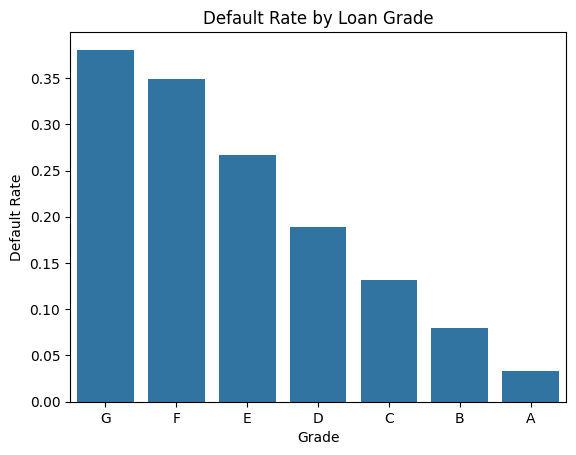

KeyError: "['int_rate', 'annual_inc', 'dti'] not in index"

In [13]:


# See size and structure
print(df.shape)
print(df.columns[:10])  # See first 10 column names
print(df.dtypes.value_counts())  # Count of types (object, float, etc.)

# Null counts
nulls = df.isnull().sum().sort_values(ascending=False)
print(nulls[nulls > 0].head(20))  # Top 20 most null-heavy columns

# Look at target column
print(df['loan_status'].value_counts())

# Visualize default rates by grade
df['is_default'] = df['loan_status'].isin(['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off'])
default_rate = df.groupby('grade')['is_default'].mean().sort_values(ascending=False)

sns.barplot(x=default_rate.index, y=default_rate.values)
plt.title('Default Rate by Loan Grade')
plt.ylabel('Default Rate')
plt.xlabel('Grade')
plt.show()

# Summary stats
print(df[['loan_amnt', 'dti']].describe())


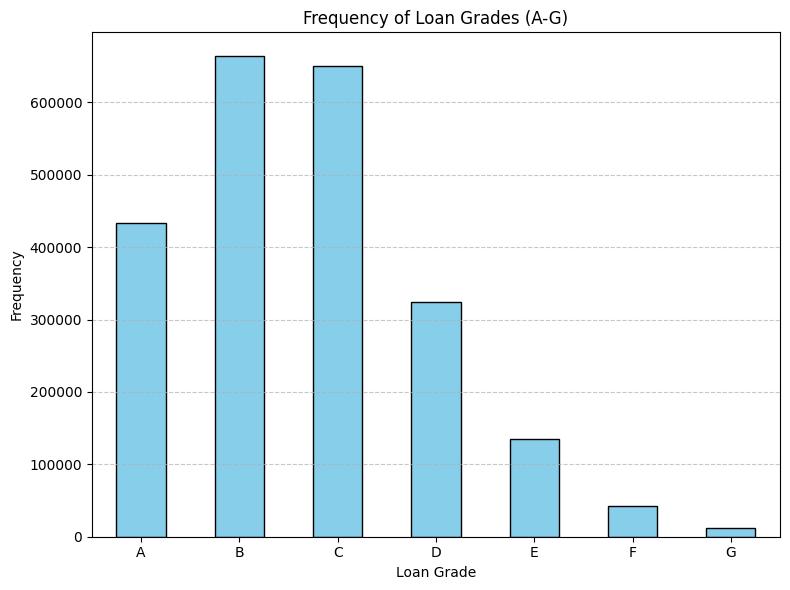

In [15]:
# Count frequency of each grade
grade_counts = df['grade'].value_counts().sort_index()  # sort_index ensures A-G order

# Plot the bar chart
plt.figure(figsize=(8, 6))
grade_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Loan Grades (A-G)')
plt.xlabel('Loan Grade')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


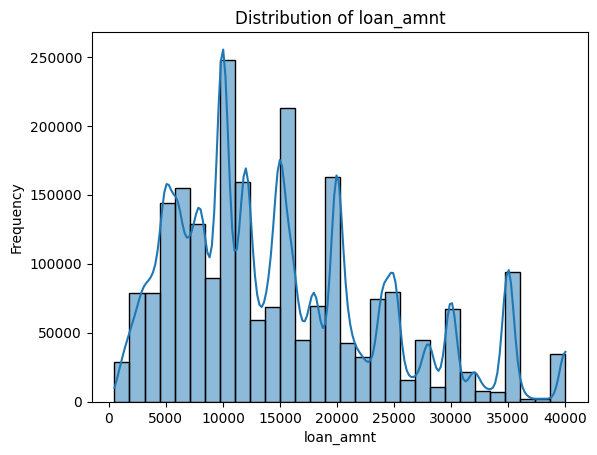

In [17]:
variable = 'loan_amnt'

# Plot the distribution
sns.histplot(df[variable], bins=30, kde=True)
plt.xlabel(variable)
plt.ylabel("Frequency")
plt.title(f"Distribution of {variable}")
plt.show()

In [19]:
# Summarizing a categorical variable (e.g., 'grade')
categorical_var = 'loan_status'

# Frequency count
print(df[categorical_var].value_counts())

# Statistical summary
print(df[categorical_var].describe())


loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64
count        2260668
unique             9
top       Fully Paid
freq         1076751
Name: loan_status, dtype: object


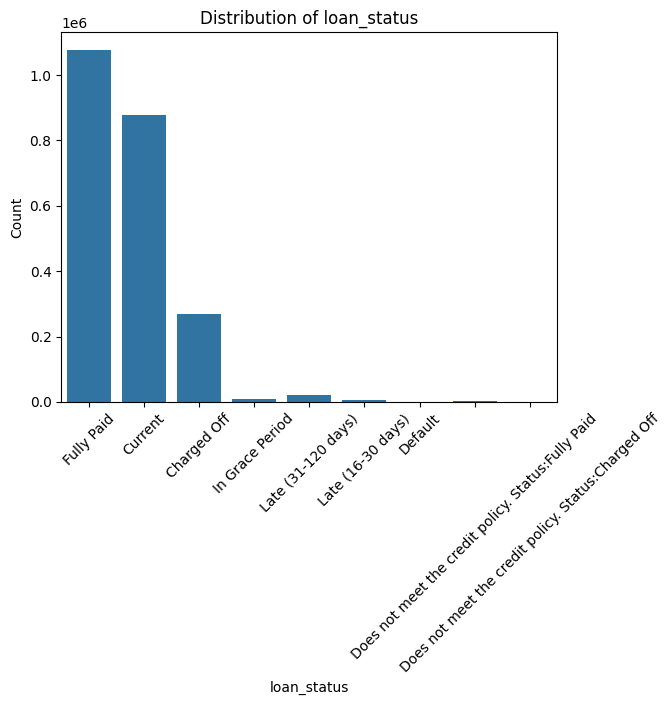

In [21]:
categorical_var = 'loan_status'

# Create a bar plot
sns.countplot(x=df[categorical_var])
plt.xlabel(categorical_var)
plt.ylabel("Count")
plt.title(f"Distribution of {categorical_var}")

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.show()

df = df.drop_duplicates()

# Remove columns where more than 50% of values are missing
threshold = 0.5 * len(df)
df = df.dropna(thresh=threshold, axis=1)

# Fill missing values
for col in df.select_dtypes(include=["number"]).columns:
    df[col] = df[col].fillna(df[col].median())  # Fill numeric columns with median

for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])  # Fill categorical columns with mode

# Standardize text formatting for categorical columns
df = df.apply(lambda x: x.str.strip().str.lower() if x.dtype == "object" else x)

# Display summary of cleaned dataset
print(df.info())

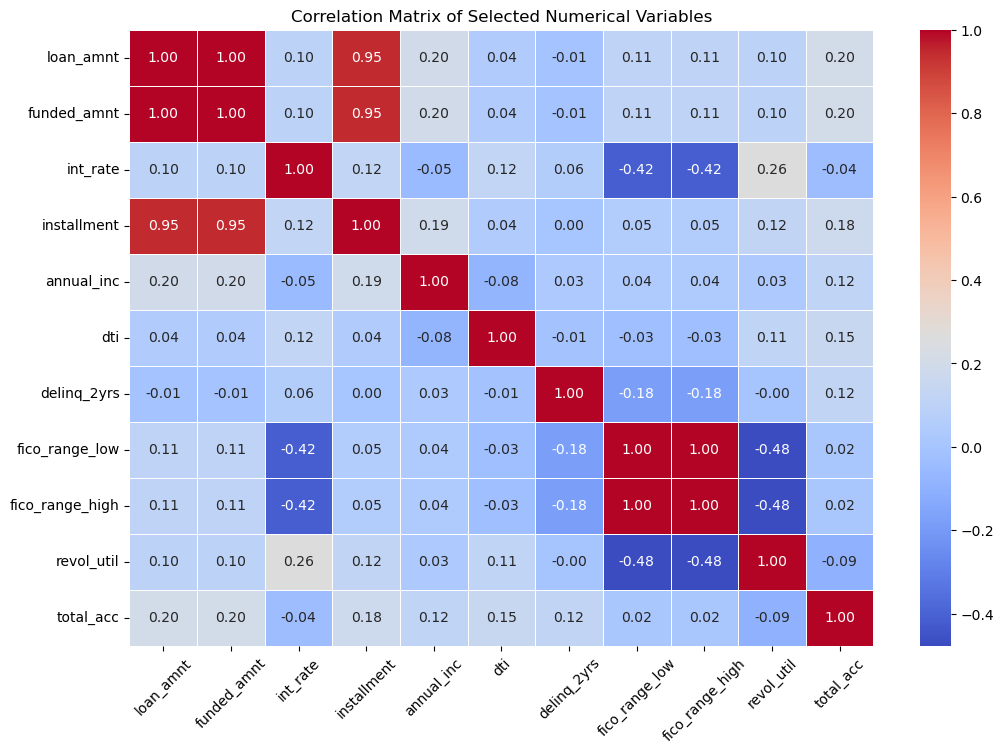

In [37]:
numerical_cols = df.select_dtypes(include=["number"])

# Define selected numerical columns
selected_cols = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc',
                 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'revol_util', 'total_acc']

# Compute correlation matrix for selected variables
corr_matrix = df[selected_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Selected Numerical Variables")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [11]:
df_def = df
df_def['loan_status'] = df['loan_status'].str.strip().str.lower()
df_def.head()




,id,loan_amnt,grade,emp_length,loan_status,title,dti
0,68407277,3600.0,C,10+ years,fully paid,Debt consolidation,5.91
1,68355089,24700.0,C,10+ years,fully paid,Business,16.06
2,68341763,20000.0,B,10+ years,fully paid,NaN,10.78
3,66310712,35000.0,C,10+ years,current,Debt consolidation,17.06
4,68476807,10400.0,F,3 years,fully paid,Major purchase,25.37


In [13]:
# Define default statuses
default_statuses = [
    'charged off',
    'default',
    'does not meet the credit policy. status:charged off'
]

non_default_statuses = [
    'fully paid',
    'does not meet the credit policy. status:fully paid'
]
# Filter to only default/non-default loans
df_def = df_def[df_def['loan_status'].isin(default_statuses + non_default_statuses)].copy()

# Create binary target
df_def['is_default'] = df_def['loan_status'].isin(default_statuses).astype(int)

# Check the distribution
print(df_def['is_default'].value_counts(normalize=True))


is_default
0    0.800193
1    0.199807
Name: proportion, dtype: float64


In [15]:
df_def.head()

,id,loan_amnt,grade,emp_length,loan_status,title,dti,is_default
0,68407277,3600.0,C,10+ years,fully paid,Debt consolidation,5.91,0
1,68355089,24700.0,C,10+ years,fully paid,Business,16.06,0
2,68341763,20000.0,B,10+ years,fully paid,NaN,10.78,0
4,68476807,10400.0,F,3 years,fully paid,Major purchase,25.37,0
5,68426831,11950.0,C,4 years,fully paid,Debt consolidation,10.20,0


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your datasets
unapproved_df = pd.read_csv("rejected_2007_to_2018Q4.csv")
rename_dict = {
    'Amount Requested' : 'loan_amnt',
    'Debt-To-Income Ratio' : 'dti',
    'Employment Length' : 'emp_length',
    'Loan Title' : 'title'
}
unapproved_df['Employment Length'] = unapproved_df['Employment Length'].str.extract(r'(\d+)', expand=False).astype(float)
approved_df = df_def
approved_df['emp_length'] = approved_df['emp_length'].str.extract(r'(\d+)', expand=False).astype(float)
unapproved_df = unapproved_df[list(rename_dict.keys())]
unapproved_df = unapproved_df.rename(columns=rename_dict)

# Convert 'dti' from percent string to float (e.g., '36%' → 0.36)
unapproved_df['dti'] = unapproved_df['dti'].str.rstrip('%').astype(float) / 100

In [19]:
print(approved_df)

               id  loan_amnt grade  emp_length  loan_status  \
0        68407277     3600.0     C        10.0   fully paid   
1        68355089    24700.0     C        10.0   fully paid   
2        68341763    20000.0     B        10.0   fully paid   
4        68476807    10400.0     F         3.0   fully paid   
5        68426831    11950.0     C         4.0   fully paid   
...           ...        ...   ...         ...          ...   
2260688  89905081    18000.0     B         5.0   fully paid   
2260690  88948836    29400.0     C         9.0   fully paid   
2260691  89996426    32000.0     C         3.0  charged off   
2260692  90006534    16000.0     C        10.0   fully paid   
2260697  88224441    24000.0     C         6.0  charged off   

                      title    dti  is_default  
0        Debt consolidation   5.91           0  
1                  Business  16.06           0  
2                       NaN  10.78           0  
4            Major purchase  25.37           0 

In [21]:
print(unapproved_df)

          loan_amnt     dti  emp_length                             title
0            1000.0  0.1000         4.0  Wedding Covered but No Honeymoon
1            1000.0  0.1000         1.0                Consolidating Debt
2           11000.0  0.1000         1.0       Want to consolidate my debt
3            6000.0  0.3864         1.0                           waksman
4            1500.0  0.0943         1.0                            mdrigo
...             ...     ...         ...                               ...
27648736    10000.0  0.4126         1.0                Debt consolidation
27648737    10000.0  0.0148         5.0                            moving
27648738     1200.0  0.1026         1.0                             Other
27648739    25000.0  0.1771         1.0                debt_consolidation
27648740    15000.0  0.1058         1.0                          Business

[27648741 rows x 4 columns]


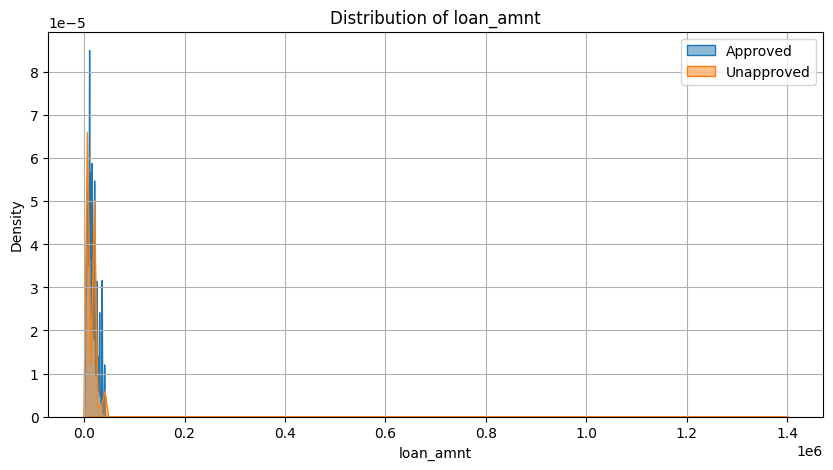

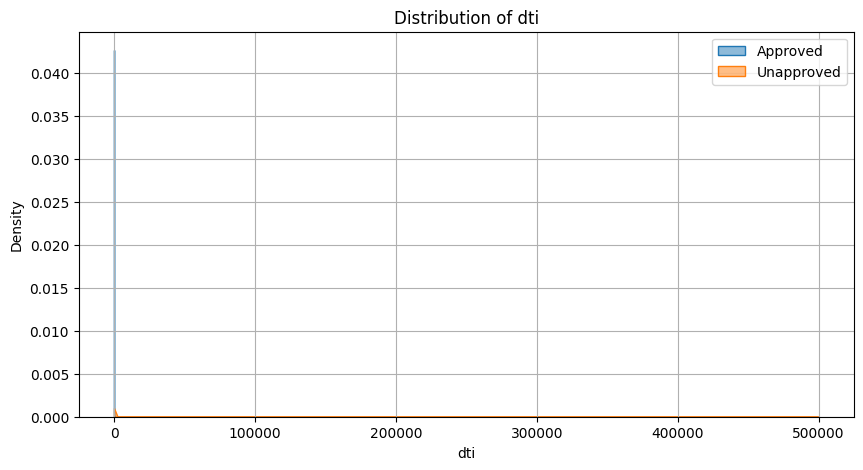

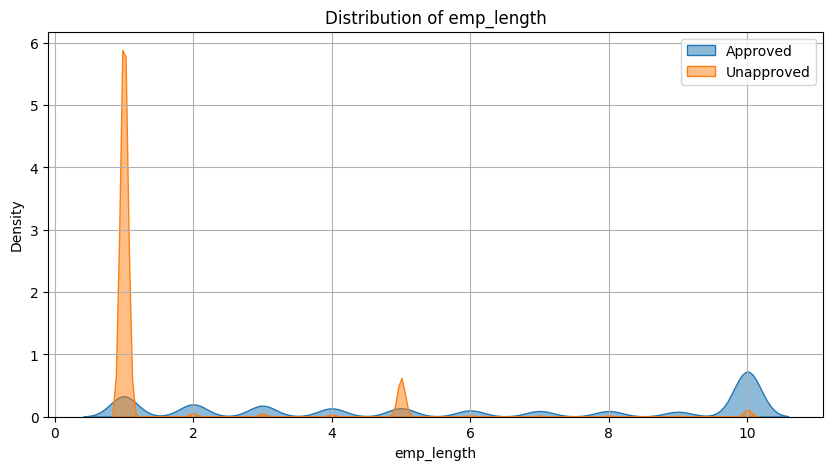

In [65]:

# List the common variables you want to compare (names may differ!)
common_vars = ['loan_amnt', 'dti', 'emp_length']  # Replace with real column names : id, loan_amnt, term, int_rate, 

for var in common_vars:
    plt.figure(figsize=(10, 5))

    # KDE plot (density)
    sns.kdeplot(approved_df[var].dropna(), label='Approved', fill=True, common_norm=False, alpha=0.5)
    sns.kdeplot(unapproved_df[var].dropna(), label='Unapproved', fill=True, common_norm=False, alpha=0.5)

    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()


In [61]:
common_vars = ['loan_amnt', 'dti', 'emp_length']  # Replace with real column names : id, loan_amnt, term, int_rate, 


# Loop through variables and compute statistics
for var in common_vars:
    print(f"\nSummary Statistics for {var}:\n{'-'*40}")
    
    approved_stats = approved_df[var].describe()
    unapproved_stats = unapproved_df[var].describe()

    summary = pd.DataFrame({
        'Approved': approved_stats,
        'Unapproved': unapproved_stats
    })

    print(summary.round(2))



Summary Statistics for loan_amnt:
----------------------------------------
         Approved   Unapproved
count  2260668.00  27648741.00
mean     15046.93     13133.24
std       9190.25     15009.64
min        500.00         0.00
25%       8000.00      4800.00
50%      12900.00     10000.00
75%      20000.00     20000.00
max      40000.00   1400000.00

Summary Statistics for dti:
----------------------------------------
         Approved   Unapproved
count  2258957.00  27648741.00
mean        18.82         1.43
std         14.18       105.39
min         -1.00        -0.01
25%         11.89         0.08
50%         17.84         0.20
75%         24.49         0.37
max        999.00    500000.31

Summary Statistics for emp_length:
----------------------------------------
         Approved   Unapproved
count  2113761.00  26697386.00
mean         6.02         1.57
std          3.59         1.66
min          1.00         1.00
25%          2.00         1.00
50%          6.00         1.00
75

In [23]:
# Save cleaned dataframe to a CSV file
approved_df.to_csv("approved_df_matched", index=False)
unapproved_df.to_csv("unapproved_df_matched", index=False)

Adding in the categorical Variable cleaning 

In [25]:
approved_titles = approved_df['title'].dropna().unique().tolist()

In [29]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')  # lightweight and fast

# Encode approved titles
approved_embeddings = model.encode(approved_titles, convert_to_tensor=True)


ModuleNotFoundError: No module named 'sentence_transformers'